In [1]:
import numpy as np
from jacobi import jacobi
from matplotlib import pyplot as plt
from scipy.optimize import approx_fprime

/var/folders/tl/pv6mt7z17tz0stm1fjfg01cc0000gp/T/ipykernel_22297/2090429165.py:42: RuntimeWarning: divide by zero encountered in divide
  plt.hist((j - ja(x))/je, bins=50, range=(-5, 5))


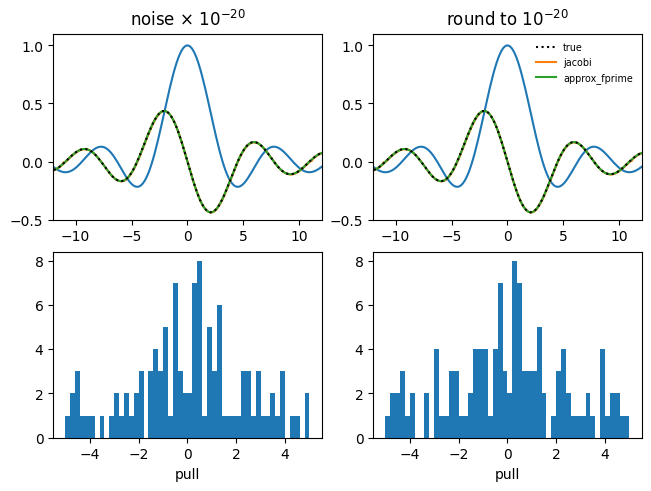

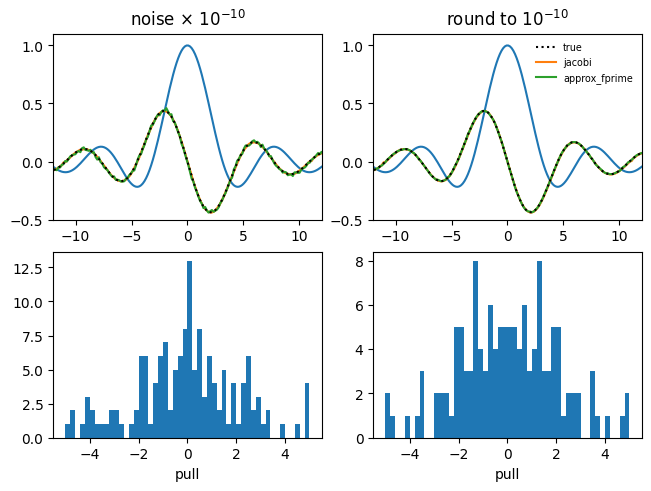

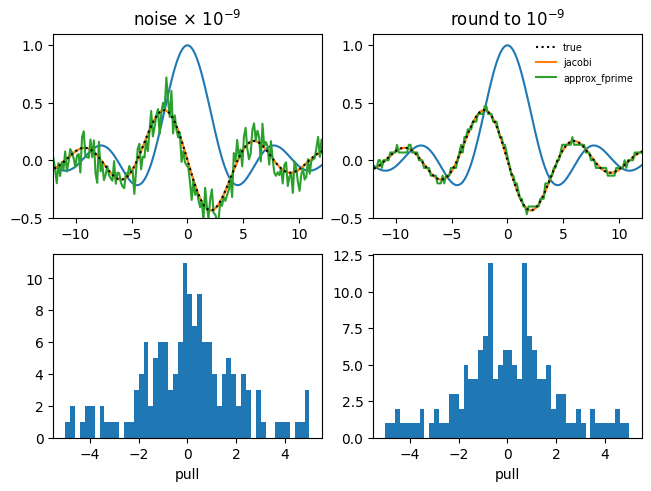

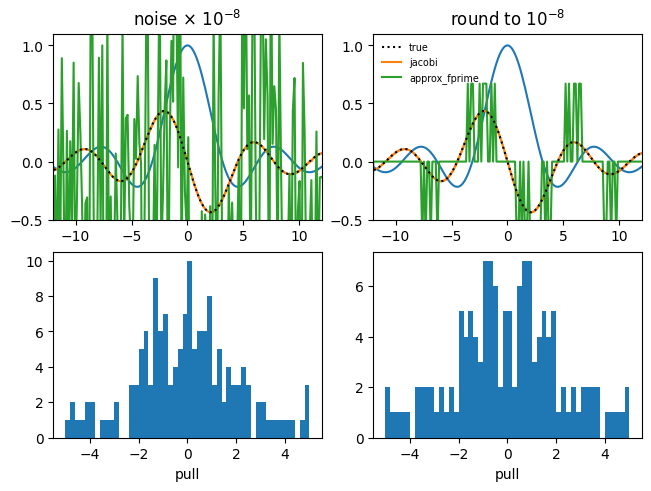

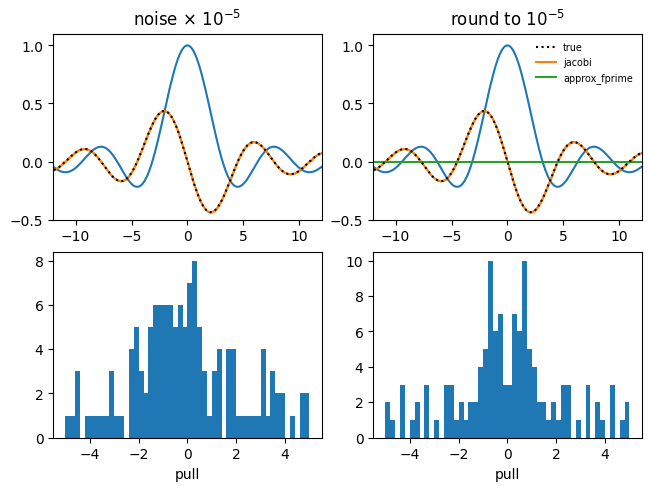

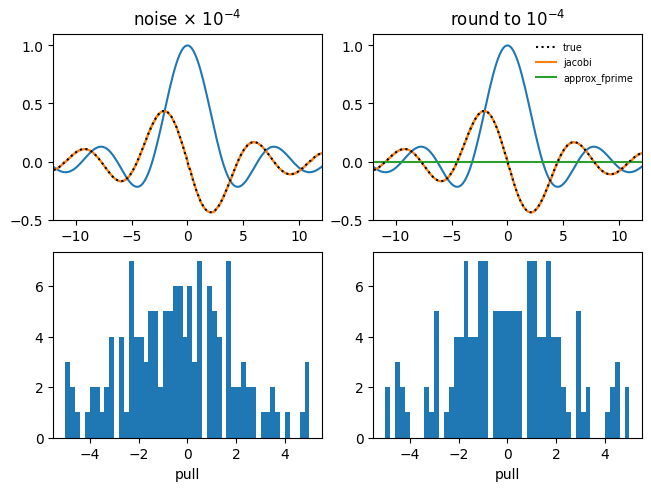

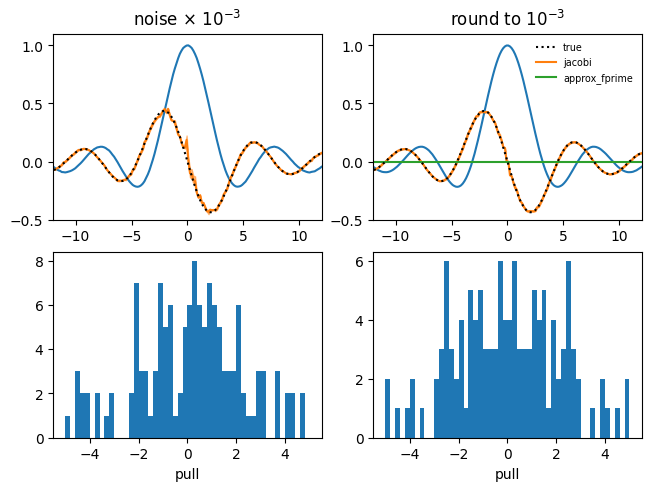

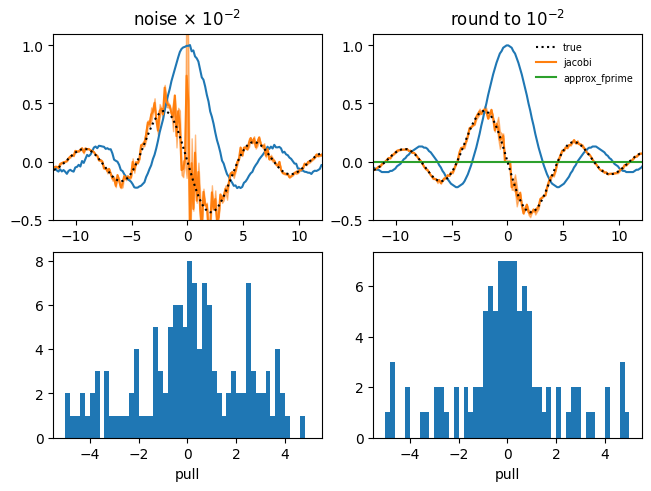

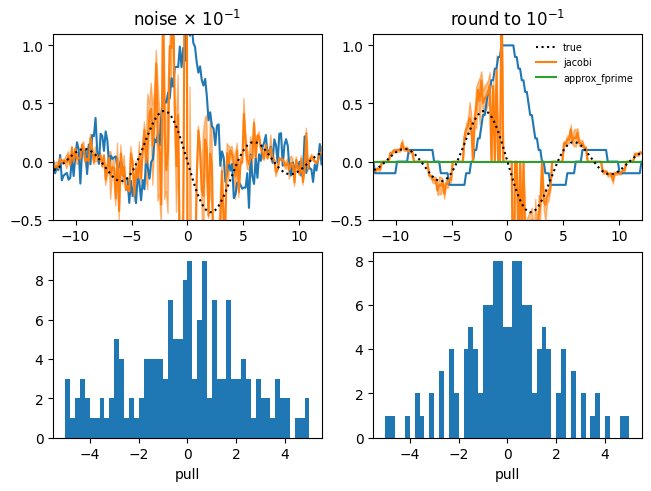

In [2]:
class NoisyFcn:
    def __init__(self, p):
        self.power = 10 ** -p
        self.rng = np.random.default_rng(1)

    def __call__(self, x):
        return np.sin(x) / x + self.power * self.rng.normal()


class RoundedFcn:
    def __init__(self, p):
        self.power = p

    def __call__(self, x):
        return np.round(np.sin(x) / x, self.power)


def ja(x):
    return (x * np.cos(x) - np.sin(x))/x ** 2

x = np.linspace(-15, 15, 200)

for p in (20, 10, 9, 8, 5, 4, 3, 2, 1):
    fig, ax = plt.subplots(2, 2, constrained_layout=True)
    for k, Fcn in enumerate((NoisyFcn, RoundedFcn)):
        fn = Fcn(p)
        j, je = np.transpose([jacobi(fn, xi) for xi in x])
        j2 = [approx_fprime(xi, lambda x: fn(x)) for xi in x]
        plt.sca(ax[0, k])
        plt.title(("noise $\\times$" if Fcn is NoisyFcn else "round to") + f" $10^{{-{p}}}$")
        plt.plot(x, [fn(xi) for xi in x])
        plt.plot(x, ja(x), label="true", color="k", ls=":", zorder=5)
        plt.plot(x, j, label="jacobi")
        if np.std(j2) < 5:
            plt.plot(x, j2, label="approx_fprime")
        plt.ylim(-0.5, 1.1)
        plt.xlim(-12, 12)
        plt.fill_between(x, j - je, j + je, color="C1", alpha=0.5)
        if k == 1:
            plt.legend(frameon=False, fontsize="x-small")
        plt.sca(ax[1, k])
        plt.hist((j - ja(x))/je, bins=50, range=(-5, 5))
        plt.xlabel("pull")


In [3]:
%timeit jacobi(fn, 1.0)

151 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%timeit approx_fprime(1.0, fn)

34.2 µs ± 343 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
